## Ejemplo 1: Boxplots

### 1. Objetivos:
    - Aprender a graficar e interpretar boxplots utilizando Seaborn
    - Aprender a lidiar con valores atípicos usando IQR-Score
 
---
    
### 2. Desarrollo:

Los boxplots son una manera de visualizar la distribución de nuestros datos usando percentiles. Vamos a utilizar una librería de visualización de datos llamada Seaborn que hace muy sencilla la creación de boxplots.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
df = pd.read_csv('/content/drive/MyDrive/BEDU/Remoto Datasets/Remoto melbourne_housing-clean.csv', index_col=0)

In [31]:
df.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


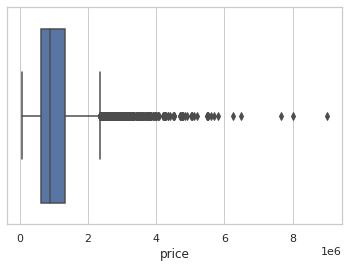

In [32]:
sns.set(style="whitegrid")
sns.boxplot(x=df['price'])

¿Qué significa todo esto?

- La caja está delimitada por 2 valores: El percentil 25 y el percentil 75.
- La línea vertical dentro de la caja indica el percentil 50 (o sea, la mediana).
- Los "bigotes" intentan abarcar el resto de los datos a la izquierda y derecha de la caja, PERO no se extienden más allá de una distancia equivalente a 1.5 * Rango Intercuartílico. Como bien recordarás, el rango intercuartílico es la diferencia entre el percentil 75 y el percentil 25. Si multiplicamos 1.5 por ese Rango Intercuartílico obtenemos el tamaño máximo de los bigotes.
- Los puntos individuales que están fuera de los bigotes son, obviamente, las muestras cuyo valor excede el tamaño máximo de los bigotes. No podemos tomar esto como una "Regla Absoluta", pero en general se considera que estos valores son los valores atípicos de nuestro conjunto.

Como puedes ver, esta gráfica nos da muchísima información muy útil.

- Ahora sabemos que la mayoría de nuestros datos están concentrados en valores menores a 2 000 000 y que los precios muy altos son anomalías en nuestro conjunto.
- Sabemos que, dentro del rango total de los datos, tenemos una distribución que tiende hacia los valores más pequeños.
- También sabemos que nuestros datos en general están muy concentrados (o sea, poco dispersos), pero que hay una "colita" de datos hacia la derecha que se extiende bastante lejos.

Vamos a ver qué pasa si graficamos una línea vertical justo donde está el promedio de nuestros datos. Para esto vamos a usar matplotlib, otra librería de visualizaciones de datos que aprenderemos a detalle más adelante:

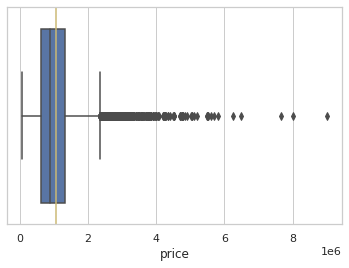

In [33]:
sns.set(style="whitegrid")
sns.boxplot(x=df['price'])
plt.axvline(df['price'].mean(), c='y')

Como puedes ver, a pesar de los valores atípicos tan extremos, tenemos tantos valores en el rango menor de nuestros datos que el promedio queda bastante cercano a la mediana.

Los valores atípicos pueden significar múltiples cosas:

- A veces son errores de medición
- A veces son errores humanos de transcripción
- Podrían ser simplemente anomalías naturales causadas por fenómenos aleatorios
- O podrían tener un significado más profundo: por ejemplo, la riqueza de alguien como Carlos Slim es una anomalía en este país, pero que es un indicador de desigualdad muy fuerte que nos da información útil acerca de la distribución de la riqueza

Decidir cómo lidiar con estos valores atípicos (si eliminarlos o dejarlos) depende totalmente del contexto.

Dado que nuestro análisis de este conjunto aún no es muy profundo, por el momento vamos a asumir la posición de eliminar estos datos, solamente para ver cómo se haría este proceso.

### Rango Intercuartílico y valores atípicos

Podemos utilizar la medida que utiliza el boxplot para limitar el tamaño de los bigotes y filtrar todos los datos que excedan ese límite. A esta medida se le suele llamar el **Score de Rango Intercuartílico (IQR-Score)**. De esa manera estamos filtrando los valores atípicos (al menos lo que se considera valores atípicos bajo este esquema).

In [34]:
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)
filtro_inferior = df['price'] > df['price'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['price'] < df['price'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df[filtro_inferior & filtro_superior]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


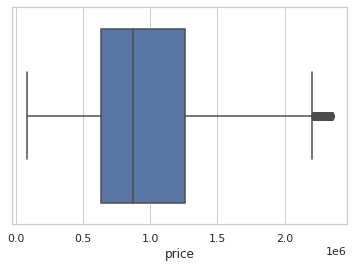

In [35]:
sns.boxplot(df_filtrado['price'])

Como ves, el algoritmo de Seaborn debe de ser ligeramente distinto al nuestro, pero el resultado fue prácticamente lo que queríamos. Ahora tenemos un conjunto de datos sin valores atípicos.

## Ejemplo 2: Tabla de frecuencias
1. Objetivos:
- Aprender a generar una tabla de frecuencias usando pd.cut

2. Desarrollo:
Como ya dijimos, las tablas de frecuencias dividen nuestro conjunto en segmentos de igual tamaño que contiene un número variable de muestras.

Para generar una tabla de frecuencias, lo primero que hay que hacer es decidir en cuántos segmentos vamos a dividir nuestros datos.



In [55]:
prices = df['price']
prices.max() - prices.min()

8915000.0

Tomando en cuenta nuestro rango, vamos a decidir dividir nuestro conjunto en 20 segmentos. Usemos ahora nuestro método cut para segmentar nuestros datos.

Ok... ¿Qué acaba de suceder? pd.cut toma el rango completo de nuestros datos, y luego crea 20 segmentos de igual tamaño. Después, revisa uno por uno nuestros datos, los ubica en uno de los segmentos y nos regresa una Serie donde tenemos cada índice clasificado en el segmento que lo toca.

Ahora, para dividir nuestro dataset por segmentos, podemos utilizar pd.groupby y pasarle la Serie que obtuvimos. Lo que hace groupby en este caso es leer la clasificación de cada índice y agruparlos de manera que todas las muestras que pertencen a la misma clasificación queden juntas.

Después de agruparlos, podemos usar un count para saber cuántas muestras hay en cada grupo:

In [58]:
segmentos= pd.cut(prices, 20)
df['price'].groupby(segmentos).count()

price
(76085.0, 530750.0]       1747
(530750.0, 976500.0]      4835
(976500.0, 1422250.0]     2664
(1422250.0, 1868000.0]    1278
(1868000.0, 2313750.0]     570
(2313750.0, 2759500.0]     261
(2759500.0, 3205250.0]     141
(3205250.0, 3651000.0]      67
(3651000.0, 4096750.0]      40
(4096750.0, 4542500.0]      16
(4542500.0, 4988250.0]      10
(4988250.0, 5434000.0]       5
(5434000.0, 5879750.0]       7
(5879750.0, 6325500.0]       1
(6325500.0, 6771250.0]       1
(6771250.0, 7217000.0]       0
(7217000.0, 7662750.0]       1
(7662750.0, 8108500.0]       1
(8108500.0, 8554250.0]       0
(8554250.0, 9000000.0]       1
Name: price, dtype: int64

8915000.0

Reto 1

In [38]:
df_earth = pd.read_csv('/content/drive/MyDrive/BEDU/Remoto Datasets/Remoto near_earth_objects-jan_feb_1995-clean.csv', index_col=0)

In [39]:
df_earth.head()

,id,name,is_potentially_hazardous_asteroid,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,close_approach_date,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour
0,2154652,154652 (2004 EP20),False,483.676488,1081.533507,1995-01-07,789467580000,Earth,16.142864,58114.308667
1,3153509,(2003 HM),True,96.506147,215.794305,1995-01-07,789491340000,Earth,12.351044,44463.757734
2,3516633,(2010 HA),False,44.111820,98.637028,1995-01-07,789446820000,Earth,6.220435,22393.567277
3,3837644,(2019 AY3),False,46.190746,103.285648,1995-01-07,789513900000,Earth,22.478615,80923.015021
4,3843493,(2019 PY),False,22.108281,49.435619,1995-01-07,789446700000,Earth,4.998691,17995.288355


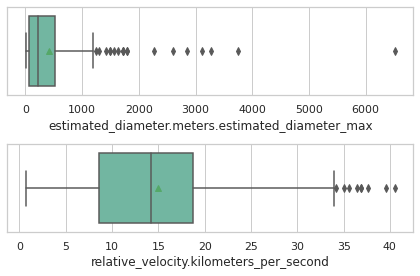

In [50]:
fig, axes = plt.subplots(2, 1)
sns.boxplot(ax=axes[0], x=df_earth['estimated_diameter.meters.estimated_diameter_max'], orient="h", palette="Set2",
            showmeans=True)
sns.boxplot(ax=axes[1], x=df_earth['relative_velocity.kilometers_per_second'], orient="h", palette="Set2",
            showmeans=True)
fig.tight_layout()
plt.show()


In [ ]:
import json
f = open('/content/drive/MyDrive/BEDU/Remoto Datasets/Remoto new_york_times_bestsellers-clean.json', 'r')
df_earth = pd.read_csv('', index_col=0)

new_york_times_bestsellers-clean.json